In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as mpl

In [2]:
df = pd.read_csv('task19.csv', encoding="windows-1251", sep=";")

In [3]:
df

,Дата,Пункт отправления,Пункт назначения,Расстояние,Расход бензина,Масса груза
0,1 октября,Липки,Березки,432,63,770
1,1 октября,Орехово,Дубки,121,17,670
2,1 октября,Осинки,Вязово,333,47,830
3,1 октября,Липки,Вязово,384,54,730
4,1 октября,Березки,Буково,135,19,540
...,...,...,...,...,...,...
365,9 октября,Березки,Буково,133,17,750
366,9 октября,Вязово,Сосново,336,47,750
367,9 октября,Осинки,Орехово,197,23,750
368,9 октября,Осинки,Липки,184,25,520


In [4]:
fuel_labels = df['Дата'].unique()
fuel_labels

array(['1 октября', '2 октября', '3 октября', '4 октября', '5 октября',
       '6 октября', '7 октября', '8 октября', '9 октября'], dtype=object)

In [7]:
fuel_data = df.groupby(['Дата']).sum()['Расход бензина']
fuel_data
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff1199', '#9f9999', '#669f99', '#f94781', '#1f9f99']

([<matplotlib.patches.Wedge at 0x1d0abd23c40>,
 [Text(1.0675097497445698, 0.2653731979689852, '1 октября'),
  Text(0.6874581626080926, 0.858720719828924, '2 октября'),
  Text(-0.09174185961353616, 1.0961676109038483, '3 октября'),
  Text(-0.7949959488418171, 0.7602509068229376, '4 октября'),
  Text(-1.0993227778517012, 0.038593135353577813, '5 октября'),
  Text(-0.8681342078786425, -0.6755316403477503, '6 октября'),
  Text(-0.23324421761770747, -1.0749870394325243, '7 октября'),
  Text(0.4532632749115189, -1.002273617140791, '8 октября'),
  Text(0.9996054997536583, -0.459117463033415, '9 октября')],
 [Text(0.5822780453152199, 0.1447490170739919, '8%'),
  Text(0.3749771796044141, 0.46839311990668575, '13%'),
  Text(-0.05004101433465608, 0.5979096059475535, '11%'),
  Text(-0.4336341539137184, 0.4146823128125114, '12%'),
  Text(-0.5996306061009278, 0.021050801101951535, '11%'),
  Text(-0.47352774975198675, -0.36847180382604555, '11%'),
  Text(-0.12722411870056768, -0.586356566963195, '11%

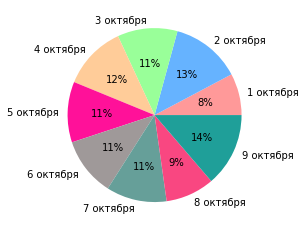

In [11]:
# Круговая диаграмма: суммарный расход бензина по датам по всем направлениям.
plt.pie(fuel_data, labels = fuel_labels, colors=colors, autopct='%.0f%%')

In [12]:
df['Расход бензина'].mean()

34.116216216216216

<AxesSubplot:xlabel='Count', ylabel='Дата'>

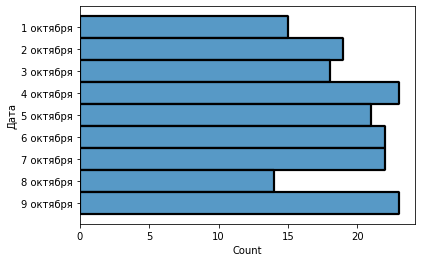

In [14]:
# Гистограмма: в какие числа расход бензина был больше среднего.
sns.histplot(data=df[df['Расход бензина'] > df['Расход бензина'].mean()], y="Дата")

In [16]:
drive_to = df.groupby(['Дата']).count()['Пункт назначения']
drive_to

Дата
1 октября    27
2 октября    47
3 октября    43
4 октября    45
5 октября    38
6 октября    41
7 октября    39
8 октября    38
9 октября    52
Name: Пункт назначения, dtype: int64

In [17]:
drive_to_labels = df['Дата'].unique()
drive_to_labels

array(['1 октября', '2 октября', '3 октября', '4 октября', '5 октября',
       '6 октября', '7 октября', '8 октября', '9 октября'], dtype=object)

([<matplotlib.patches.Wedge at 0x1d0abfb9fd0>,
 [Text(1.071220473684588, 0.2499733921019734, '1 октября'),
  Text(0.7197049062730877, 0.8318803086300615, '2 октября'),
  Text(-0.05601493941687868, 1.0985728590139678, '3 октября'),
  Text(-0.7876605008685075, 0.7678482502236833, '4 октября'),
  Text(-1.097463279678657, 0.07466156813894256, '5 октября'),
  Text(-0.9060977740366762, -0.6236880822059858, '6 октября'),
  Text(-0.313163147129976, -1.0544803664742408, '7 октября'),
  Text(0.39275101284621555, -1.0274953245189353, '8 октября'),
  Text(0.9945129348034025, -0.4700468301230457, '9 октября')],
 [Text(0.5843020765552298, 0.13634912296471274, '27'),
  Text(0.3925663125125932, 0.4537528956163971, '47'),
  Text(-0.030553603318297456, 0.5992215594621643, '43'),
  Text(-0.4296330004737313, 0.4188263183038272, '45'),
  Text(-0.5986163343701765, 0.040724491712150486, '38'),
  Text(-0.4942351494745506, -0.34019349938508314, '41'),
  Text(-0.17081626207089598, -0.5751711089859495, '39'),
  

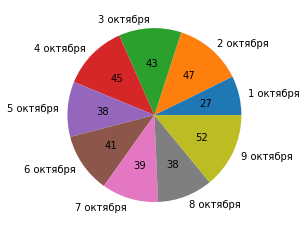

In [18]:
# Круговая диаграмма: количество поездок в числа, представленные в датасете.
plt.pie(drive_to, labels=drive_to_labels, autopct=lambda x: '{:.0f}'.format(x*drive_to.sum()/100))